# DATA SCIENCE - The Hepatocellular Carcinoma Dataset

Work by Francisco Carqueija (202205113), Pedro Pereira (202307836) and Simão Gomes (202304752)

## Table of contents

<!-- Hello World -->

1. [Introduction](#1.-introduction)
2. [Libraries Needed](#2.-Libraries-Needed)
3. [Data Exploration](#3.-Data-Exploration)
4. [Data Preprocessing](#4.-Data-Preprocessing)
5. [Features Importance](#5.Features-Importance)
6. [Data Modeling](#6.-Data-Modeling)
    - [Evaluation 0 (Using the entire dataset)](#Evaluation-0-(Using-the-entire-dataset))
    - [Evaluation 1 (Features with most importance)](#Evaluation-1-(Features-with-most-importance))
    - [Evaluation 2 (Features with least importance)](#Evaluation-2-(Features-with-least-importance))
    - [Evaluation 3 (Features with the least amount of missing data)](#Evaluation-3-(Features-with-the-least-amount-of-missing-data))
    - [Evaluation 4 (Features with the largest amount of missing data)](#Evaluation-4-(Features-with-the-largest-amount-of-missing-data))
    - [Evaluation 5 (Without features that are not important and without feautures with missing values)](#Evaluation-5-(Without-features-that-are-not-important-and-without-feautures-with-missing-values))
7. [Results Analysis and Comparison](#7.-Results-Analysis-and-Comparison)
















-----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1. Introduction
[[ go back to the top ]](#Table-of-contents)

- Data Science has many applications in our daily lives, including in not so obvious areas like in medicine. In this project, we aim to predict the livelihood of patients diagnosed with Hepatocellular Carcinoma (HCC) using a dataset from the Coimbra Hospital and University Center. This dataset contains information about the patients' lifestyle, medical findings and levels, and overall data that is useful for our goal: finding if the patient is alive in a 1-year period.


- The objective of this project is to utilize various data cleaning and selection methods, along with different data modeling techniques, to predict patient survival within a one-year period. We will compare these models using different evaluation metrics to determine the most effective approach.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2. Libraries Needed
[[ go back to the top ]](#Table-of-contents)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Split
from sklearn.model_selection import train_test_split

# Iterative Imputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_auc_score, roc_curve,balanced_accuracy_score,ConfusionMatrixDisplay





-----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3. Data Exploration
[[ go back to the top ]](#Table-of-contents)

In [2]:
df=pd.read_csv("hcc_dataset.csv")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

df.head() 

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,?,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137,15,Active,NaN,NaN,1.53,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0,?,Active,NaN,NaN,?,?,?,?,?,?,?,?,?,?,?,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50,50,Ambulatory,NaN,Mild,0.96,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40,30,Active,NaN,NaN,0.95,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100,30,Active,NaN,NaN,0.94,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,109,6.9,1.8,1,9,?,59,15,22,Lives


In [4]:
df['Encephalopathy'].fillna('None',inplace = True)
df['Ascites'].fillna('None',inplace = True)


/var/folders/hy/92_0_w315732kcf7v6g1v4dm0000gn/T/ipykernel_9450/3655011907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Encephalopathy'].fillna('None',inplace = True)
/var/folders/hy/92_0_w315732kcf7v6g1v4dm0000gn/T/ipykernel_9450/3655011907.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [5]:
df.head() 

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,?,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137,15,Active,None,None,1.53,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0,?,Active,None,None,?,?,?,?,?,?,?,?,?,?,?,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50,50,Ambulatory,None,Mild,0.96,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40,30,Active,None,None,0.95,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100,30,Active,None,None,0.94,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,109,6.9,1.8,1,9,?,59,15,22,Lives


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        165 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           165 non-null    object
 4   HBeAg           165 non-null    object
 5   HBcAb           165 non-null    object
 6   HCVAb           165 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         165 non-null    object
 9   Smoking         165 non-null    object
 10  Diabetes        165 non-null    object
 11  Obesity         165 non-null    object
 12  Hemochro        165 non-null    object
 13  AHT             165 non-null    object
 14  CRI             165 non-null    object
 15  HIV             165 non-null    object
 16  NASH            165 non-null    object
 17  Varices         165 non-null    object
 18  Spleno    

In [7]:
df.describe(include='all')

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
count,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165.000000,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
unique,2,3,2,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,NaN,20,31,5,4,4,88,133,72,129,106,132,42,63,94,108,140,125,47,85,7,69,42,69,58,85,2
top,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,NaN,?,0,Active,None,None,1.2,?,12.6,95.1,4.9,77000,3.2,1,31,85,196,109,7.3,0.7,1,?,?,?,?,?,Lives
freq,133,94,122,132,125,103,122,149,116,63,106,135,135,103,143,148,135,69,84,110,126,125,111,NaN,48,61,80,142,109,7,8,8,5,6,5,12,11,7,6,3,5,12,11,67,20,44,79,80,80,102
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.690909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.319534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Gender            0
Symptoms          0
Alcohol           0
HBsAg             0
HBeAg             0
HBcAb             0
HCVAb             0
Cirrhosis         0
Endemic           0
Smoking           0
Diabetes          0
Obesity           0
Hemochro          0
AHT               0
CRI               0
HIV               0
NASH              0
Varices           0
Spleno            0
PHT               0
PVT               0
Metastasis        0
Hallmark          0
Age               0
Grams_day         0
Packs_year        0
PS                0
Encephalopathy    0
Ascites           0
INR               0
AFP               0
Hemoglobin        0
MCV               0
Leucocytes        0
Platelets         0
 Albumin          0
Total_Bil         0
ALT               0
AST               0
GGT               0
ALP               0
TP                0
Creatinine        0
Nodules           0
Major_Dim         0
Dir_Bil           0
Iron              0
Sat               0
Ferritin          0
Class             0


Why does this happen? 
After taking a look to the dataset, we can conclude that the function is considering the missing values as None and not as '?', therefore its giving us results we don't want.


Let's take a look to another approach:


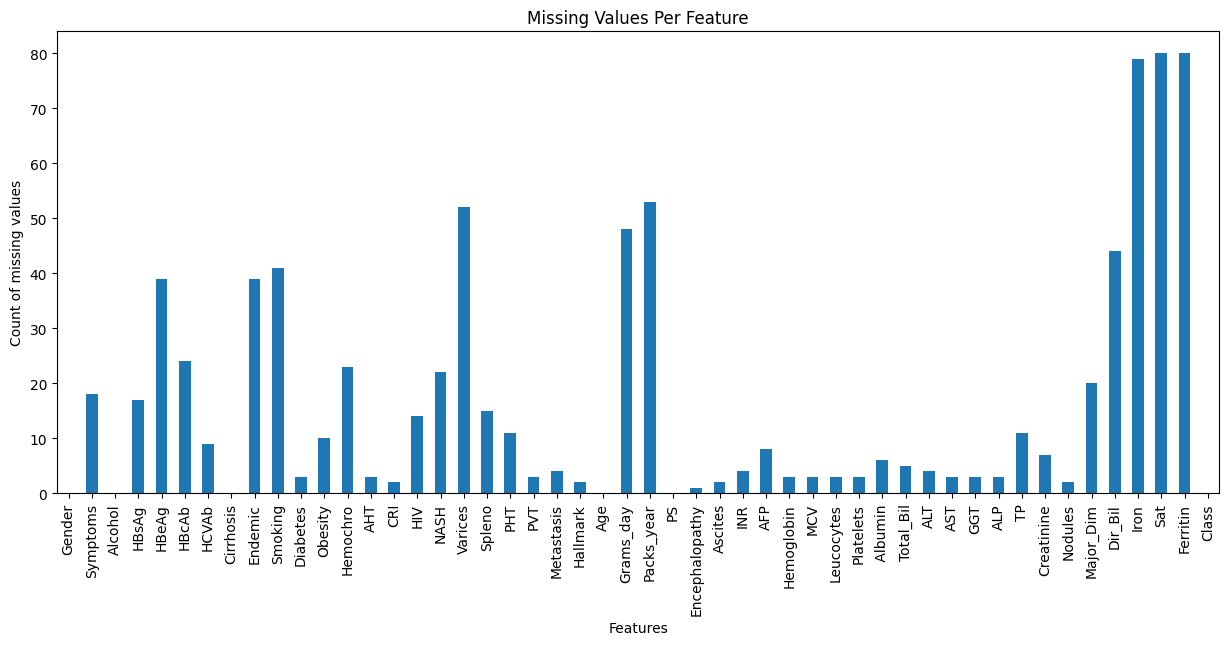

In [9]:
# Replace '?' with NaN for proper missing value handling
df.replace('?', np.nan, inplace=True)

missing_data = df.isnull().sum()
#print(missing_data)
# df.info()

# Visualizing missing data
plt.figure(figsize=(15, 6))
missing_data.plot(kind='bar')
plt.title('Missing Values Per Feature')
plt.xlabel('Features')
plt.ylabel('Count of missing values')
plt.show()


In [10]:
missing_values_count = df.isna().sum()
sorted_columns = missing_values_count.sort_values().index
sorted_df = df[sorted_columns]
sorted_y=sorted_df['Class']
sorted_x=sorted_df.drop('Class',axis=1)

In [11]:
# List of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f'Numerical features ({len(numerical_features)}): {numerical_features}')

# List of categorical features
categorical_features = df.select_dtypes(include=['category']).columns.tolist()
print(f'Categorical features ({len(categorical_features)}): {categorical_features}')

# List of features considerd as object 
object_features = df.select_dtypes(include=['object']).columns.tolist()
print(f'Object features ({len(object_features)}): {object_features}')



Numerical features (1): ['Age']
Categorical features (0): []
Object features (49): ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Grams_day', 'Packs_year', 'PS', 'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin', 'Class']


## 4. Data Preprocessing
[[ go back to the top ]](#Table-of-contents)

In [12]:
df['Gender']=df['Gender'].replace({'Male': 0, 'Female': 1})

df['PS']=df['PS'].replace({'Active': 1, 'Ambulatory': 2, 'Restricted': 3, 'Selfcare': 4, 'Disabled': 5})

df['Encephalopathy']=df['Encephalopathy'].replace({'None': 0, 'Grade I/II': 1, 'Grade III/IV': 2})

df['Ascites']=df['Ascites'].replace({'None': 0, 'Mild': 1, 'Moderate/Severe': 2})

df['Class']=df['Class'].replace({'Lives': 1, 'Dies': 0})

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    int64  
 1   Symptoms        147 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           148 non-null    object 
 4   HBeAg           126 non-null    object 
 5   HBcAb           141 non-null    object 
 6   HCVAb           156 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         126 non-null    object 
 9   Smoking         124 non-null    object 
 10  Diabetes        162 non-null    object 
 11  Obesity         155 non-null    object 
 12  Hemochro        142 non-null    object 
 13  AHT             162 non-null    object 
 14  CRI             163 non-null    object 
 15  HIV             151 non-null    object 
 16  NASH            143 non-null    object 
 17  Varices         113 non-null    obj

/var/folders/hy/92_0_w315732kcf7v6g1v4dm0000gn/T/ipykernel_9450/655736230.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'Male': 0, 'Female': 1})
/var/folders/hy/92_0_w315732kcf7v6g1v4dm0000gn/T/ipykernel_9450/655736230.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PS']=df['PS'].replace({'Active': 1, 'Ambulatory': 2, 'Restricted': 3, 'Selfcare': 4, 'Disabled': 5})
/var/folders/hy/92_0_w315732kcf7v6g1v4dm0000gn/T/ipykernel_9450/655736230.py:5: FutureWarning: Downcasting behavior in 

In [13]:
# Determine columns that should be numeric but are stored as object due to mixed types
def is_numeric_column(col):
    if col.dtype == 'object':
        try:
            return col.astype(str).str.isnumeric().any()
        except AttributeError:
            return False
    return False

numeric_columns = df.columns[df.apply(is_numeric_column)]

# Convert these columns to float (as they may contain real numbers or NaNs)
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Convert binary categorical variables ('Yes'/'No') to numeric (1/0)
binary_columns = df.select_dtypes(include=['object']).columns
for column in binary_columns:
    df[column]=df[column].replace({'Yes': 1, 'No': 0})


/var/folders/hy/92_0_w315732kcf7v6g1v4dm0000gn/T/ipykernel_9450/3584657811.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column]=df[column].replace({'Yes': 1, 'No': 0})


In [14]:
# Define a threshold for dropping columns based on missing value percentage
threshold_percentage = 50  # Threshold set at 50%

# Calculate the percentage of missing values for each column
missing_percentage = df.isna().sum() / len(df) * 100

# Identify columns to drop based on the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold_percentage].index.tolist()

# Drop identified columns
hcc_data_cleaned = df.drop(columns=columns_to_drop)

# Impute missing values for numerical columns with the median
for column in hcc_data_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    hcc_data_cleaned[column].fillna(hcc_data_cleaned[column].median(), inplace=True)

# Impute missing values for categorical columns with the mode
for column in hcc_data_cleaned.select_dtypes(include=['object']).columns:
    hcc_data_cleaned[column].fillna(hcc_data_cleaned[column].mode()[0], inplace=True)


# Check remaining missing values and data types after all transformations
hcc_data_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    int64  
 1   Symptoms        165 non-null    float64
 2   Alcohol         165 non-null    int64  
 3   HBsAg           165 non-null    float64
 4   HBeAg           165 non-null    float64
 5   HBcAb           165 non-null    float64
 6   HCVAb           165 non-null    float64
 7   Cirrhosis       165 non-null    int64  
 8   Endemic         165 non-null    float64
 9   Smoking         165 non-null    float64
 10  Diabetes        165 non-null    float64
 11  Obesity         165 non-null    float64
 12  Hemochro        165 non-null    float64
 13  AHT             165 non-null    float64
 14  CRI             165 non-null    float64
 15  HIV             165 non-null    float64
 16  NASH            165 non-null    float64
 17  Varices         165 non-null    flo

/var/folders/hy/92_0_w315732kcf7v6g1v4dm0000gn/T/ipykernel_9450/2874419586.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hcc_data_cleaned[column].fillna(hcc_data_cleaned[column].median(), inplace=True)
/var/folders/hy/92_0_w315732kcf7v6g1v4dm0000gn/T/ipykernel_9450/2874419586.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

In [15]:
# # Initialize the IterativeImputer
# imp = IterativeImputer(estimator=RandomForestRegressor(), missing_values=np.nan, max_iter=10, random_state=0)

# # Fit on the data and transform it
# df_imputed = imp.fit_transform(df)

# # Convert the imputed data back to a DataFrame
# df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# # Re-check the info to ensure no missing values remain
# df_imputed.info()
# df_imputed


In the box above there's this code that handles missing data by using an iterative imputation approach, which can provide more accurate estimates by leveraging the interrelationships between features.
We thought and tried to execute this method, but we realised it wouldn't be effective our, atleast very thruthful as it was giving float values to boolean features. As the target of our study is the diagnosis of a patient, we realised we shouldn't pursue it any further. 

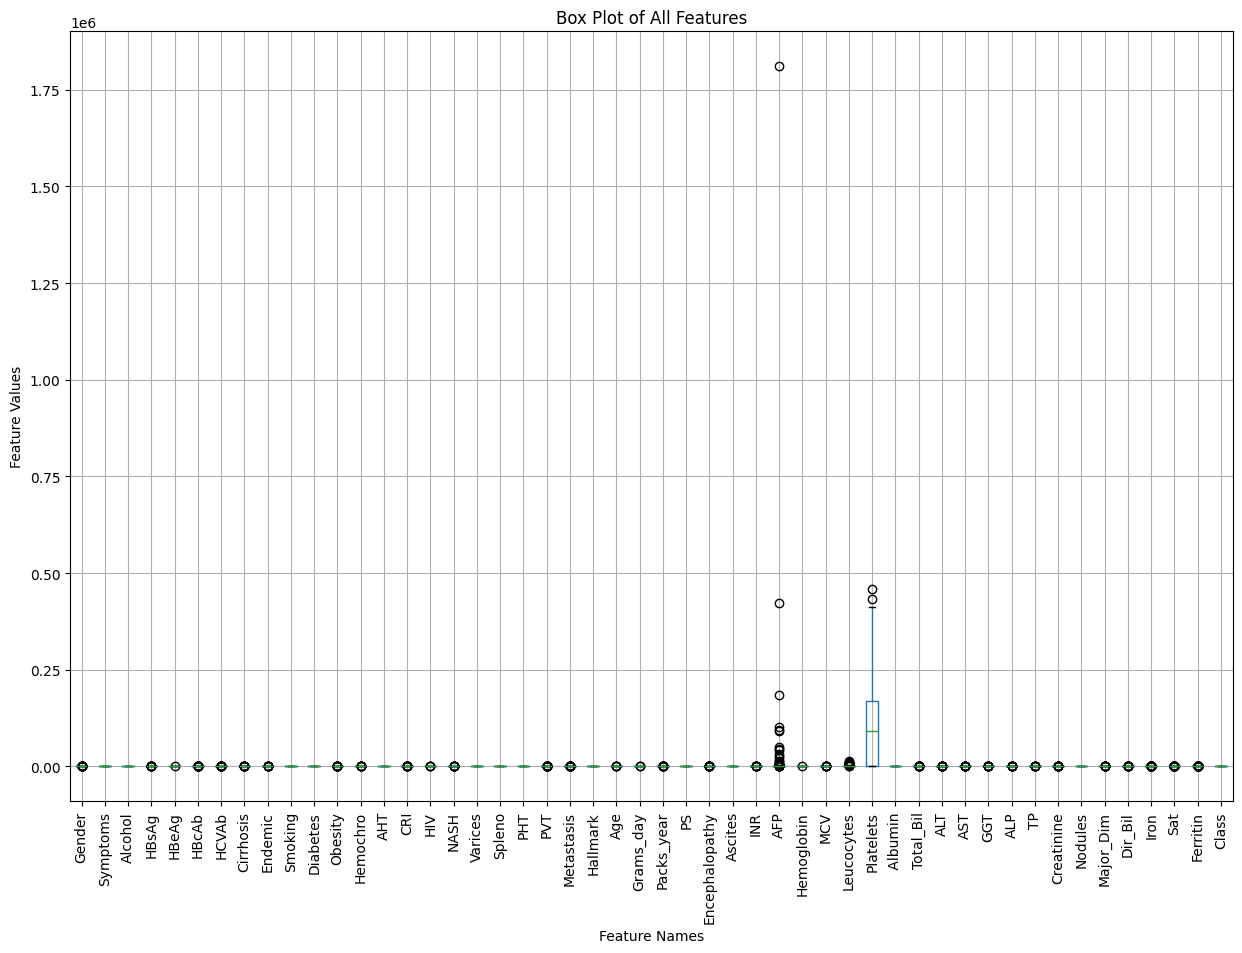

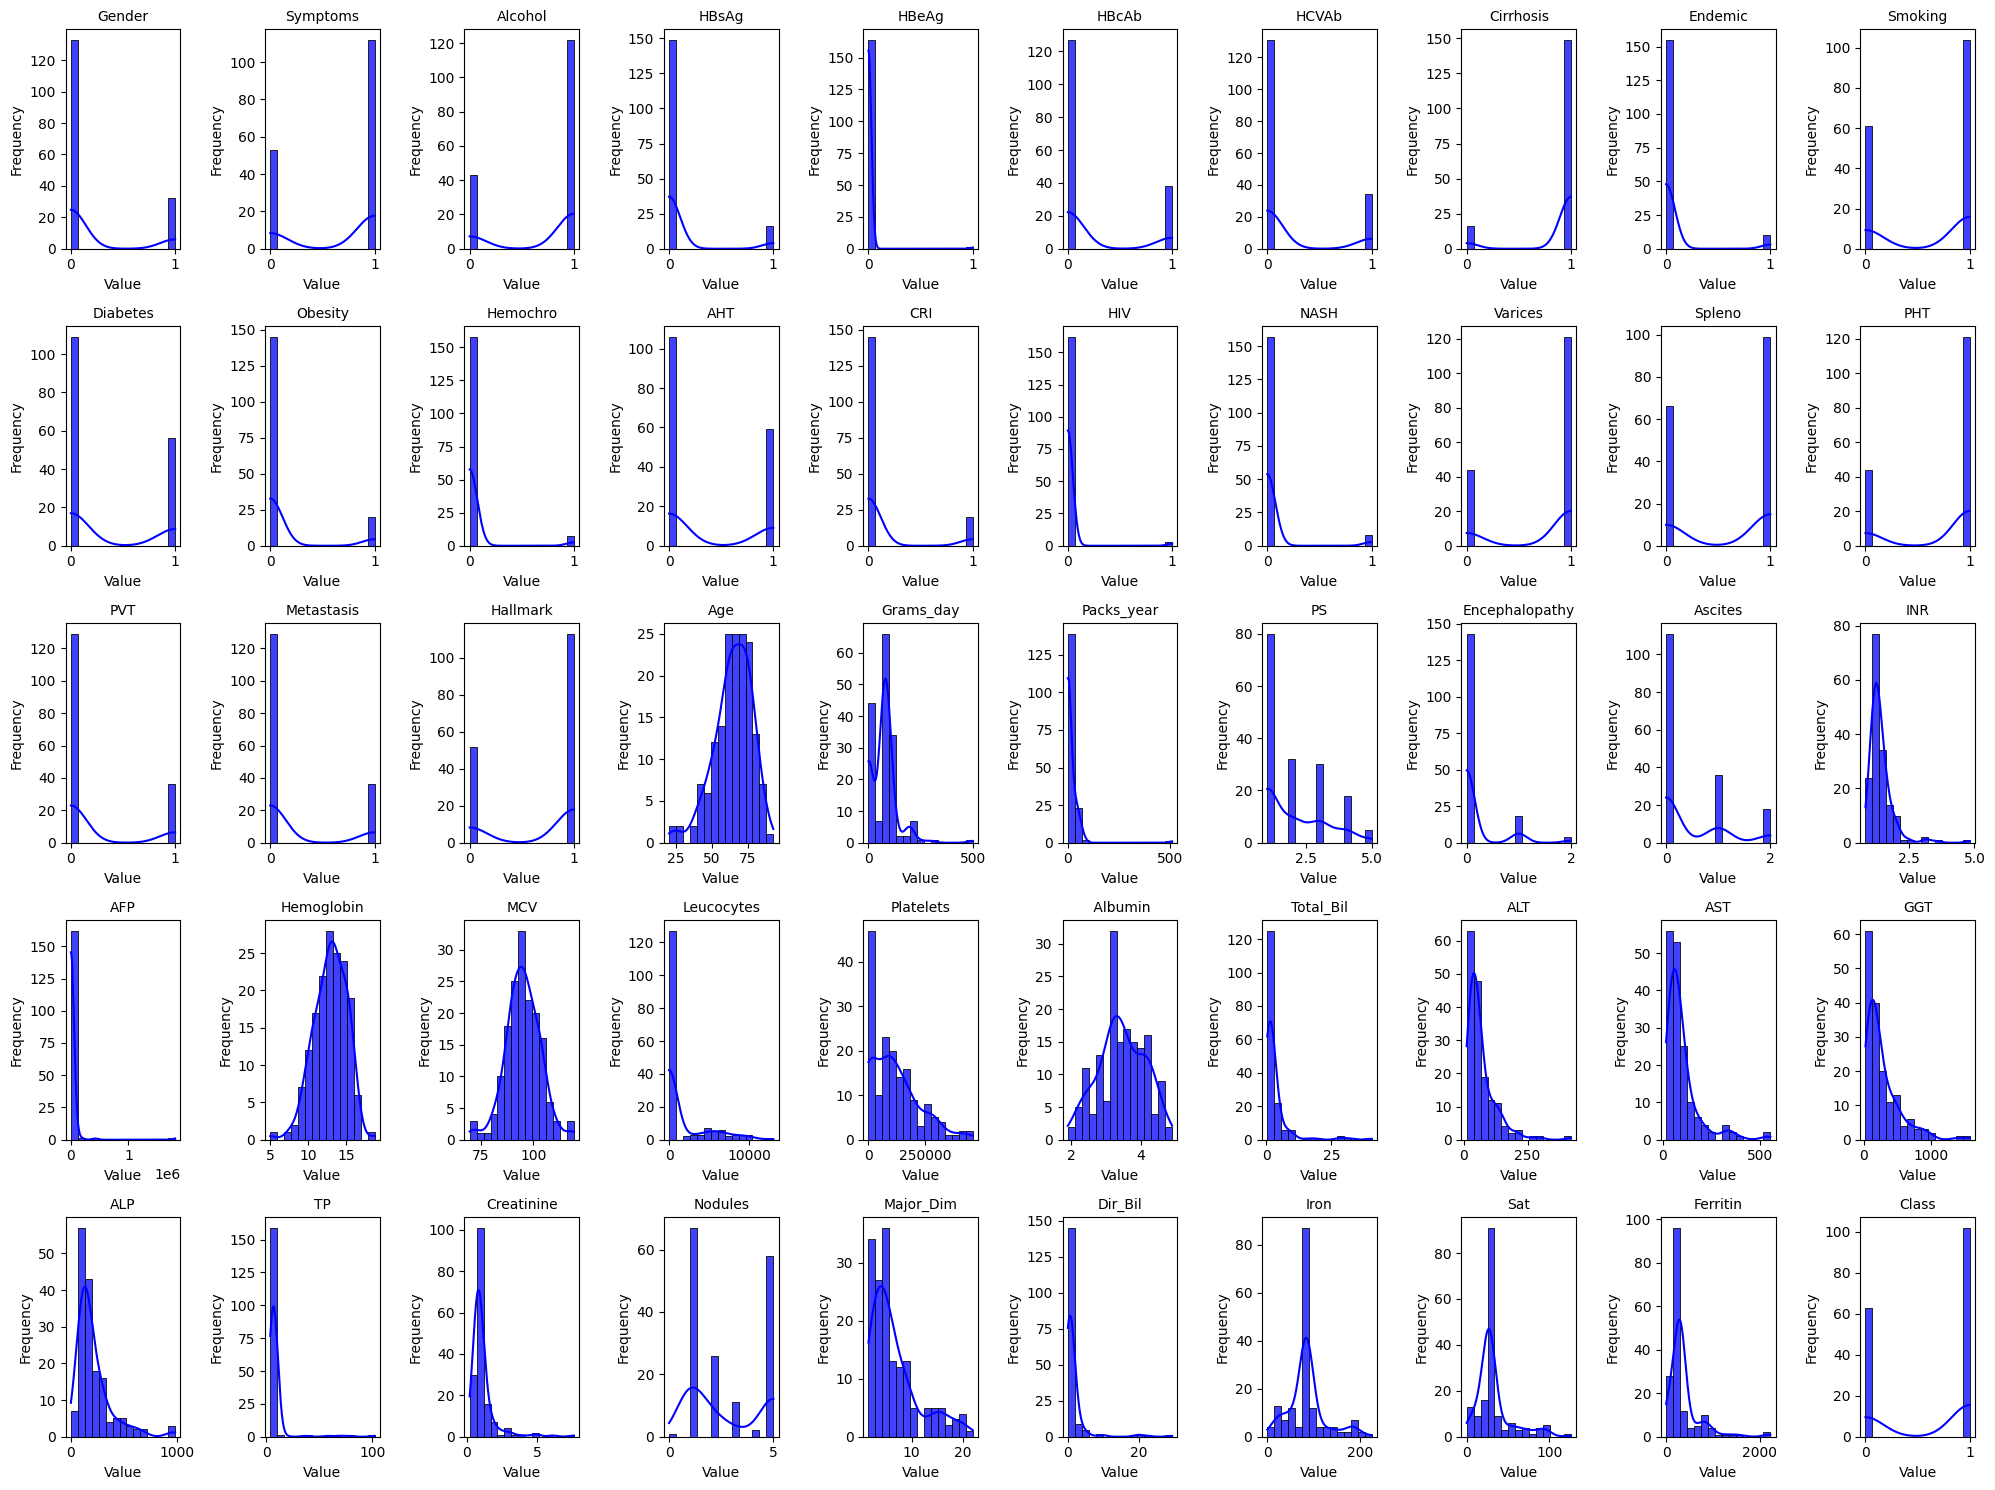

In [16]:
# Identifying outliers using boxplots
plt.figure(figsize=(15, 10))
hcc_data_cleaned.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot of All Features')
plt.xlabel('Feature Names')  # X-axis label
plt.ylabel('Feature Values')  # Y-axis label
plt.show()



# Calculate the number of plots needed
num_features = len(hcc_data_cleaned.columns)  # Total number of features in the dataset
cols_per_plot = 10  # Number of columns (features) per plot
rows_per_plot = 5   # Number of rows per plot

# Total number of plots
num_plots = (num_features + cols_per_plot * rows_per_plot - 1) // (cols_per_plot * rows_per_plot)

# Create histograms for each set of features in separate plots
for i in range(num_plots):
    start_index = i * cols_per_plot * rows_per_plot
    end_index = min(start_index + cols_per_plot * rows_per_plot, num_features)
    fig, axs = plt.subplots(rows_per_plot, cols_per_plot, figsize=(20, 15))
    axs = axs.flatten()  # Flatten the array of axes for easier iteration
    for j, col in enumerate(hcc_data_cleaned.columns[start_index:end_index]):
        sns.histplot(hcc_data_cleaned[col].dropna(), bins=15, ax=axs[j], kde=True, color='blue', alpha=0.75)
        axs[j].set_title(col, fontsize=10)
        axs[j].set_xlabel('Value')  # X-axis label
        axs[j].set_ylabel('Frequency')  # Y-axis label
    for ax in axs[j+1:]:
        ax.set_visible(False)  # Hide unused subplots
    plt.tight_layout()
    plt.show()




From the first graph, we can observe the existence of an outlier, but we won't remove it from our dataset for now, as it can be irrelevant due to the size of the dataset.
The group of graphs above tells us the distribution of values and we can see that several features have a boolean value (0 or 1) and that there's a high disparity of frequency in most of them. 

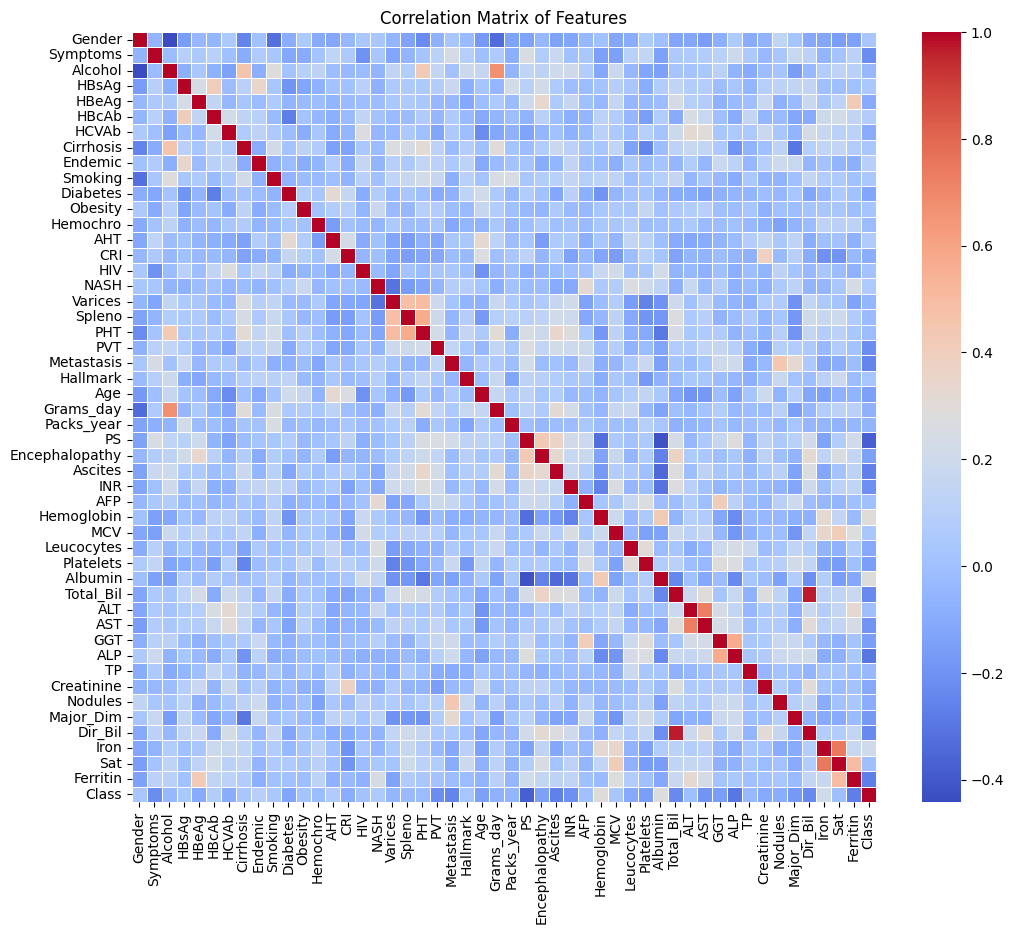

In [17]:
# Correlation matrix to see how features relate to each other
plt.figure(figsize=(12, 10))
correlation_matrix = hcc_data_cleaned.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()


These plots reveal the presence of outliers in several numerical variables such as Grams_day, Packs_year, INR, and AFP. These outliers may need further investigation or different handling methods during the data preprocessing phase before modeling.

The heatmap provides a visual representation of the relationships between numerical variables. This matrix helps identify which variables are most correlated with each other and with the target variable, aiding in feature selection for the modeling phase.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 5.Features Importance
[[ go back to the top ]](#Table-of-contents)

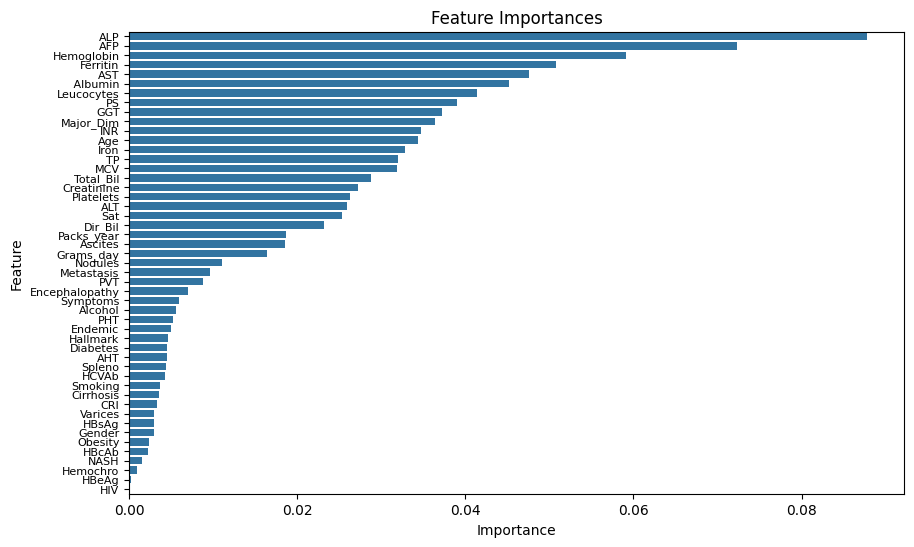

In [18]:
feat = hcc_data_cleaned.drop(columns='Class')
t = hcc_data_cleaned['Class']

model = RandomForestClassifier()
model.fit(feat, t)

importances = model.feature_importances_
features = feat.columns

feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

feature_importances_sorted=feature_importances.sort_values(by='Importance', ascending=False)
feature_importances_sort=[{row['Feature']: row['Importance']} for _, row in feature_importances_sorted.iterrows()]

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, orient='h')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tick_params(axis='y', labelsize=8)
plt.show()

In [19]:
importances_order = []
for key in feature_importances_sort:
    importances_order.extend(key.keys())

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

# 6. Data Modeling
[[ go back to the top ]](#Table-of-contents)

In [20]:
def test_algorithm(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics 
    ac = accuracy_score(y_test, y_pred)
    balanced_ac = balanced_accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recc = recall_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)  # Ensure pos_label is correctly defined
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)




    # Setup subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 12x5 inches figure, two subplots in one row

    # Plot the Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, ax=ax1)
    ax1.set_title('Confusion Matrix')

    # Plot the ROC curve
    ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax2.legend(loc="lower right")

    # Display plots
    plt.tight_layout()  # Adjust layout to not overlap
    plt.show()

    # Print accuracy metrics
    print('Accuracy score = ', ac)
    print('Balanced Accuracy Score = ', balanced_ac)
    print('Precision Score = ', prec)
    print('Recall score = ',recc)

    return ac


In [21]:
# List to make comparisons later
dt_accuracy_score_list = []
knn_accuracy_score_list = []
rf_accuracy_score_list = []

- ### Evaluation 0 (Using the entire dataset)
[[ go back to the top ]](#Table-of-contents)


In [22]:
# Assuming 'Class' is the target variable and already encoded as 0 or 1
X = hcc_data_cleaned.drop('Class', axis=1)
y = hcc_data_cleaned['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)


#Initialize the Random Forest classifier
cv_classifier= RandomForestClassifier(random_state=42)

Decision Tree Evaluation:


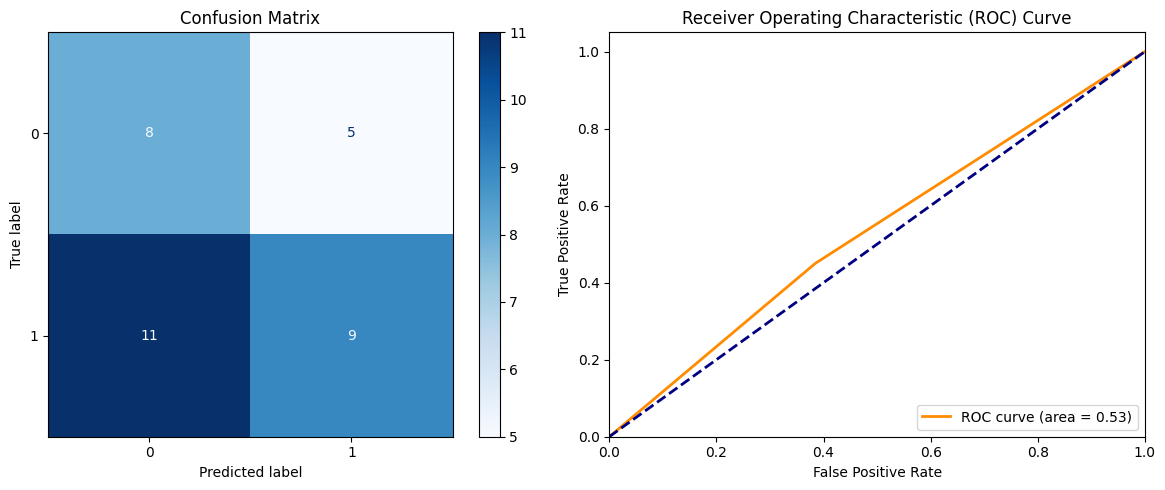

Accuracy score =  0.5151515151515151
Balanced Accuracy Score =  0.5326923076923077
Precision Score =  0.6428571428571429
Recall score =  0.45
**************************************************************************************************************************************************************************
KNN Evaluation:


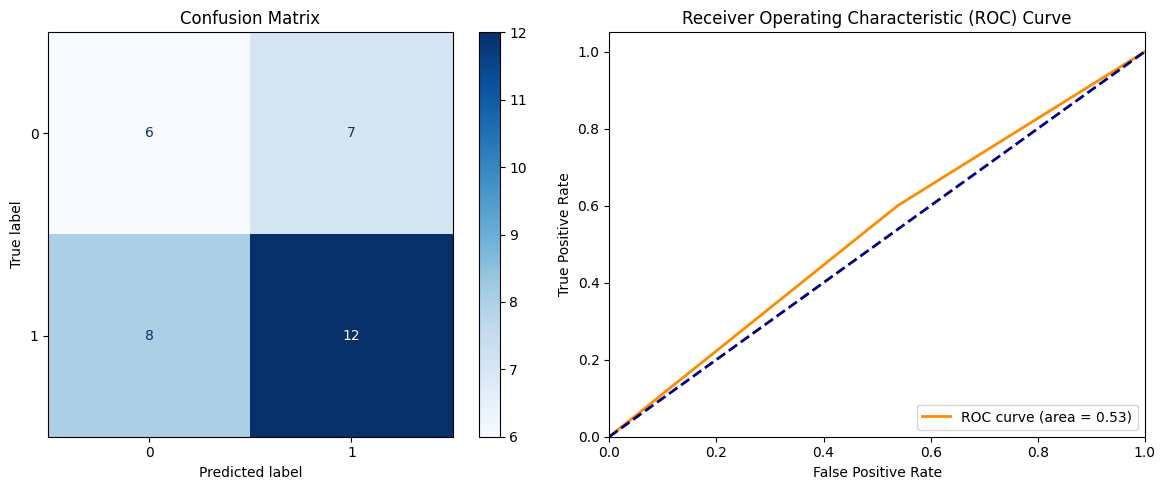

Accuracy score =  0.5454545454545454
Balanced Accuracy Score =  0.5307692307692308
Precision Score =  0.631578947368421
Recall score =  0.6
**************************************************************************************************************************************************************************
Random Validation Forest:


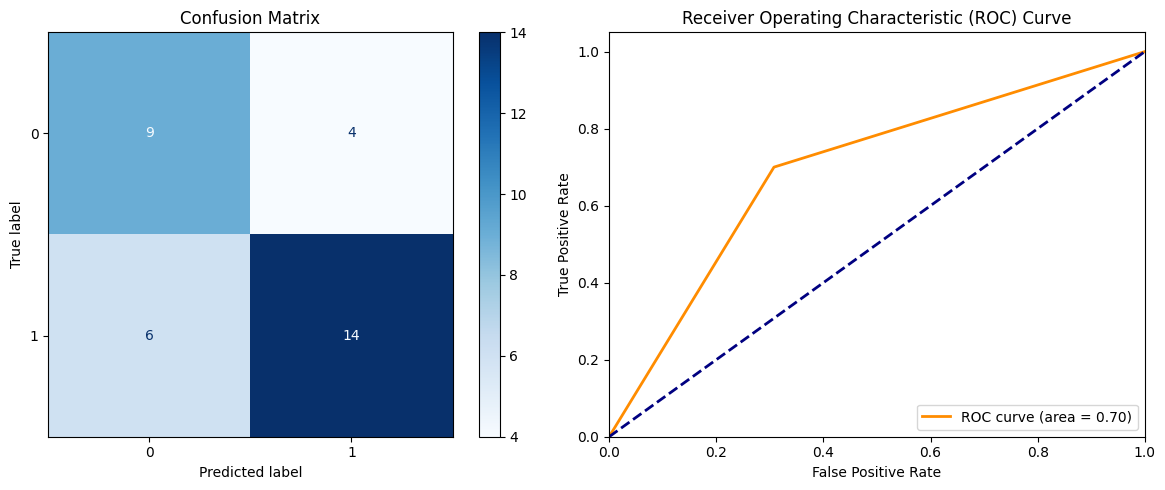

Accuracy score =  0.696969696969697
Balanced Accuracy Score =  0.6961538461538461
Precision Score =  0.7777777777777778
Recall score =  0.7


In [23]:
# Decision Tree evaluation
print("Decision Tree Evaluation:")
ac = test_algorithm(dt_classifier,X_train, y_train, X_test, y_test)
dt_accuracy_score_list.append(ac)

print("**************************************************************************************************************************************************************************")

# KNN evaluation
print("KNN Evaluation:")
ac = test_algorithm(knn_classifier,X_train, y_train, X_test, y_test)
knn_accuracy_score_list.append(ac)


print("**************************************************************************************************************************************************************************")


# Random Forest evaluation
print("Random Validation Forest:")
ac = test_algorithm(cv_classifier,X_train, y_train, X_test, y_test)
rf_accuracy_score_list.append(ac)

- ### Evaluation 1 (Features with most importance)
[[ go back to the top ]](#Table-of-contents)


In [24]:
high_importance = list(importances_order[:15])
inputs_high=hcc_data_cleaned[high_importance]

In [25]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_high, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)


#Initialize the Random Forest classifier
cv_classifier= RandomForestClassifier(random_state=42)

Decision Tree Evaluation:


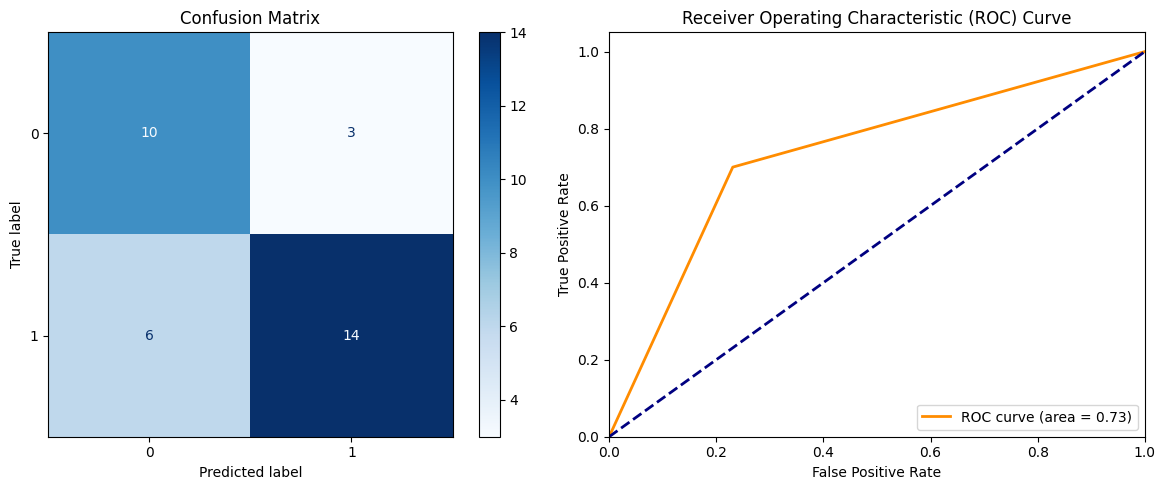

Accuracy score =  0.7272727272727273
Balanced Accuracy Score =  0.7346153846153847
Precision Score =  0.8235294117647058
Recall score =  0.7
**************************************************************************************************************************************************************************
KNN Evaluation:


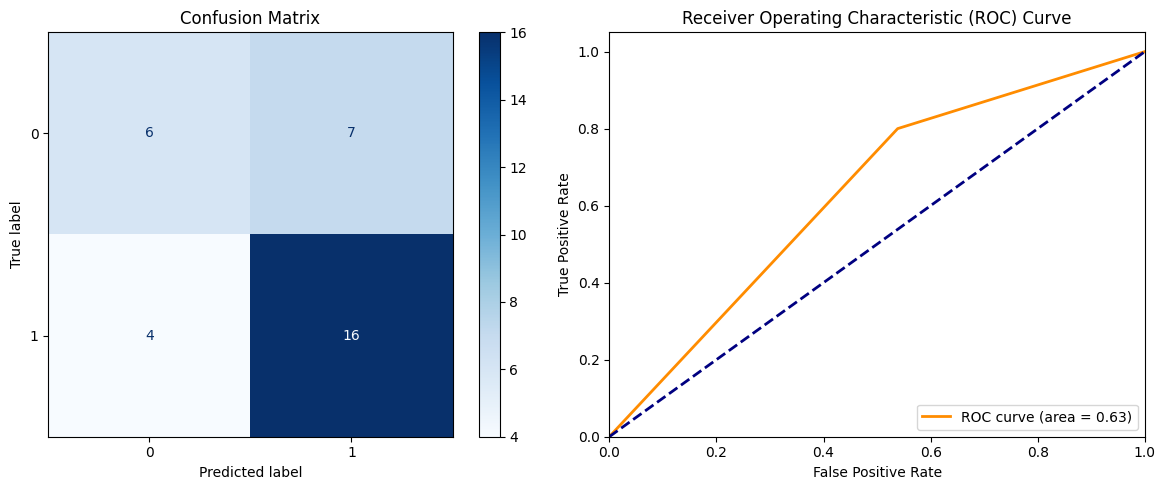

Accuracy score =  0.6666666666666666
Balanced Accuracy Score =  0.6307692307692307
Precision Score =  0.6956521739130435
Recall score =  0.8
**************************************************************************************************************************************************************************
Random Validation Forest:


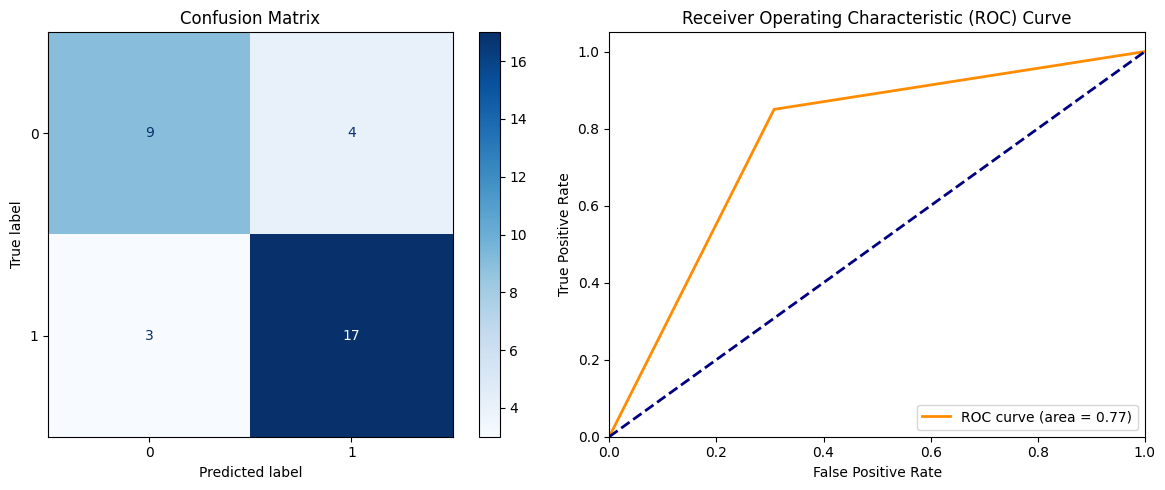

Accuracy score =  0.7878787878787878
Balanced Accuracy Score =  0.7711538461538461
Precision Score =  0.8095238095238095
Recall score =  0.85


In [26]:
# Decision Tree evaluation
print("Decision Tree Evaluation:")
ac = test_algorithm(dt_classifier,X_train, y_train, X_test, y_test)
dt_accuracy_score_list.append(ac)

print("**************************************************************************************************************************************************************************")

# KNN evaluation
print("KNN Evaluation:")
ac = test_algorithm(knn_classifier,X_train, y_train, X_test, y_test)
knn_accuracy_score_list.append(ac)


print("**************************************************************************************************************************************************************************")


# Random Forest evaluation
print("Random Validation Forest:")
ac = test_algorithm(cv_classifier,X_train, y_train, X_test, y_test)
rf_accuracy_score_list.append(ac)

- ### Evaluation 2 (Features with least importance)
[[ go back to the top ]](#Table-of-contents)



In [27]:
low_importance = list(importances_order[-15:])
inputs_low=hcc_data_cleaned[low_importance]

In [28]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_low, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)


#Initialize the Random Forest classifier
cv_classifier= RandomForestClassifier(random_state=42)

Decision Tree Evaluation:


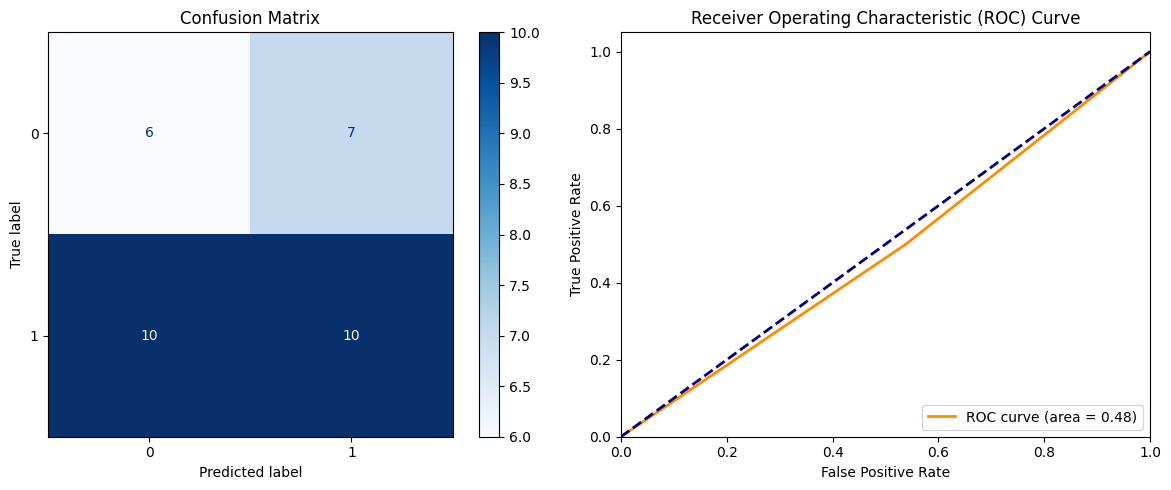

Accuracy score =  0.48484848484848486
Balanced Accuracy Score =  0.4807692307692308
Precision Score =  0.5882352941176471
Recall score =  0.5
**************************************************************************************************************************************************************************
KNN Evaluation:


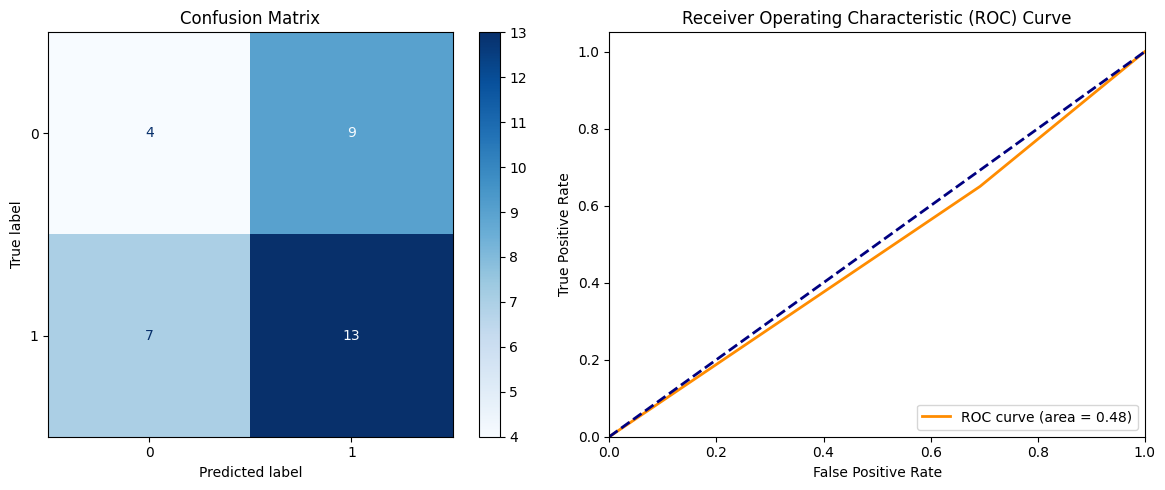

Accuracy score =  0.5151515151515151
Balanced Accuracy Score =  0.47884615384615387
Precision Score =  0.5909090909090909
Recall score =  0.65
**************************************************************************************************************************************************************************
Random Validation Forest:


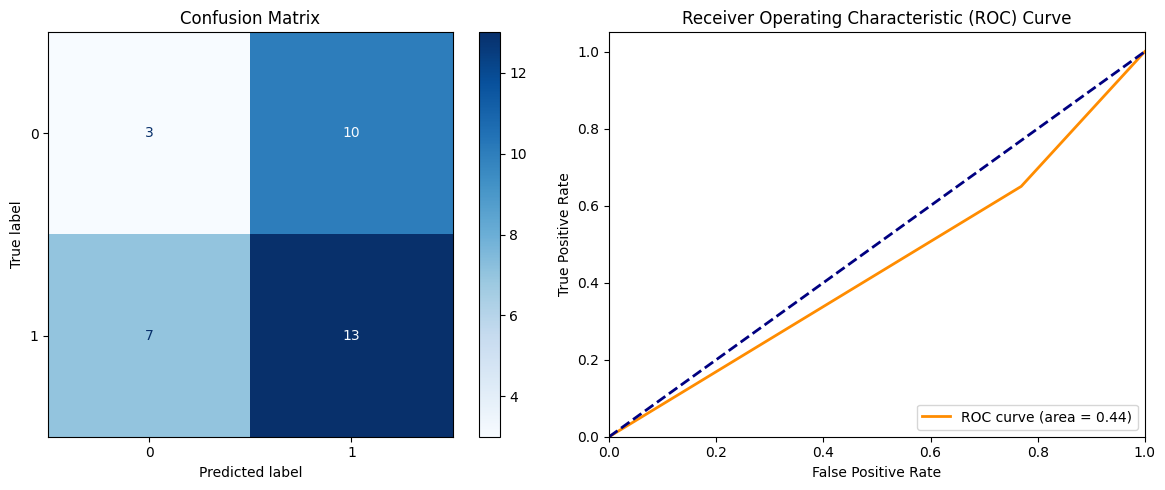

Accuracy score =  0.48484848484848486
Balanced Accuracy Score =  0.4403846153846154
Precision Score =  0.5652173913043478
Recall score =  0.65


In [29]:
# Decision Tree evaluation
print("Decision Tree Evaluation:")
ac = test_algorithm(dt_classifier,X_train, y_train, X_test, y_test)
dt_accuracy_score_list.append(ac)

print("**************************************************************************************************************************************************************************")

# KNN evaluation
print("KNN Evaluation:")
ac = test_algorithm(knn_classifier,X_train, y_train, X_test, y_test)
knn_accuracy_score_list.append(ac)


print("**************************************************************************************************************************************************************************")


# Random Forest evaluation
print("Random Validation Forest:")
ac = test_algorithm(cv_classifier,X_train, y_train, X_test, y_test)
rf_accuracy_score_list.append(ac)

- ### Evaluation 3 (Features with the least amount of missing data)
[[ go back to the top ]](#Table-of-contents)




In [30]:
sorted_df = hcc_data_cleaned[sorted_columns]
sorted_y=sorted_df['Class']
sorted_x=sorted_df.drop('Class',axis=1)

inputs_notmissing=sorted_x.iloc[:, :20]

In [31]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_notmissing, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)


#Initialize the Random Forest classifier
cv_classifier= RandomForestClassifier(random_state=42)

Decision Tree Evaluation:


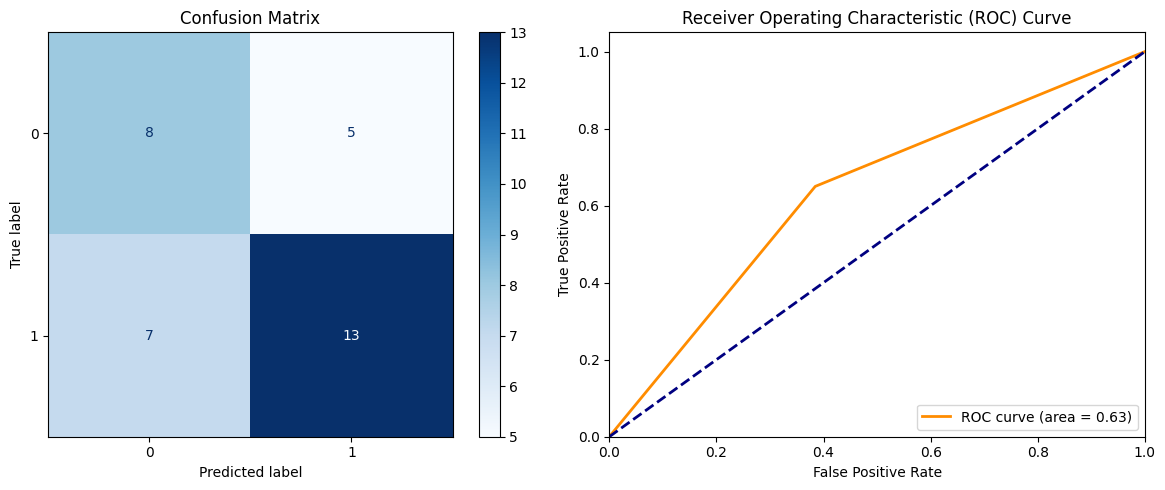

Accuracy score =  0.6363636363636364
Balanced Accuracy Score =  0.6326923076923077
Precision Score =  0.7222222222222222
Recall score =  0.65
**************************************************************************************************************************************************************************
KNN Evaluation:


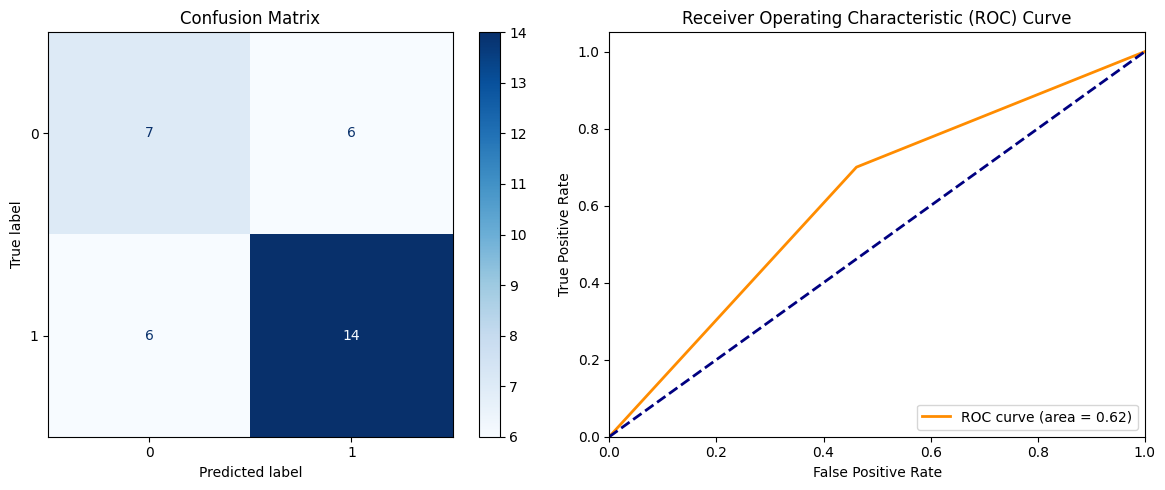

Accuracy score =  0.6363636363636364
Balanced Accuracy Score =  0.6192307692307693
Precision Score =  0.7
Recall score =  0.7
**************************************************************************************************************************************************************************
Random Validation Forest:


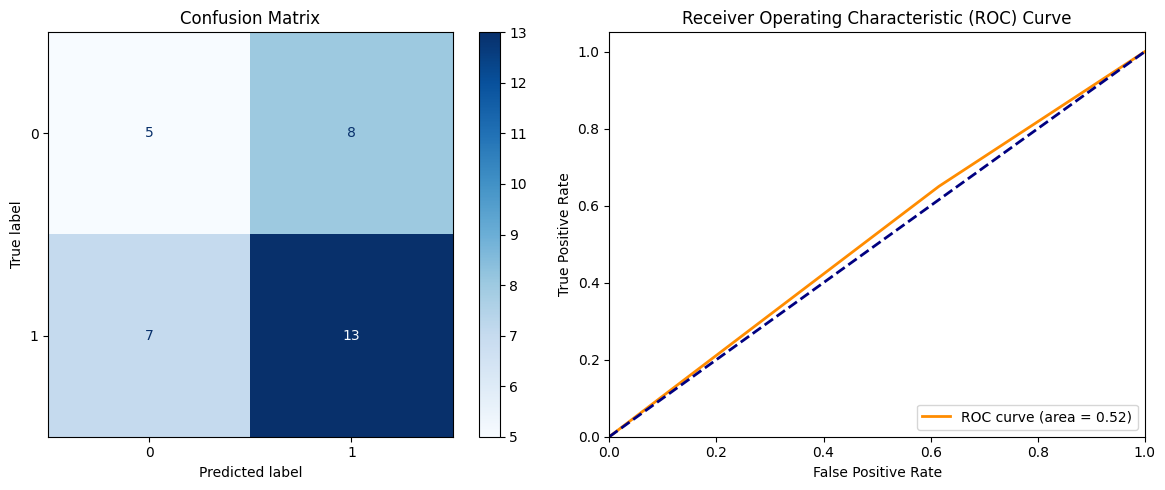

Accuracy score =  0.5454545454545454
Balanced Accuracy Score =  0.5173076923076924
Precision Score =  0.6190476190476191
Recall score =  0.65


In [32]:
# Decision Tree evaluation
print("Decision Tree Evaluation:")
ac = test_algorithm(dt_classifier,X_train, y_train, X_test, y_test)
dt_accuracy_score_list.append(ac)

print("**************************************************************************************************************************************************************************")

# KNN evaluation
print("KNN Evaluation:")
ac = test_algorithm(knn_classifier,X_train, y_train, X_test, y_test)
knn_accuracy_score_list.append(ac)


print("**************************************************************************************************************************************************************************")


# Random Forest evaluation
print("Random Validation Forest:")
ac = test_algorithm(cv_classifier,X_train, y_train, X_test, y_test)
rf_accuracy_score_list.append(ac)

- ### Evaluation 4 (Features with the largest amount of missing data)
[[ go back to the top ]](#Table-of-contents)





In [33]:
inputs_missing=sorted_x.iloc[:, -20:]

In [34]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_missing, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)


#Initialize the Random Forest classifier
cv_classifier= RandomForestClassifier(random_state=42)

Decision Tree Evaluation:


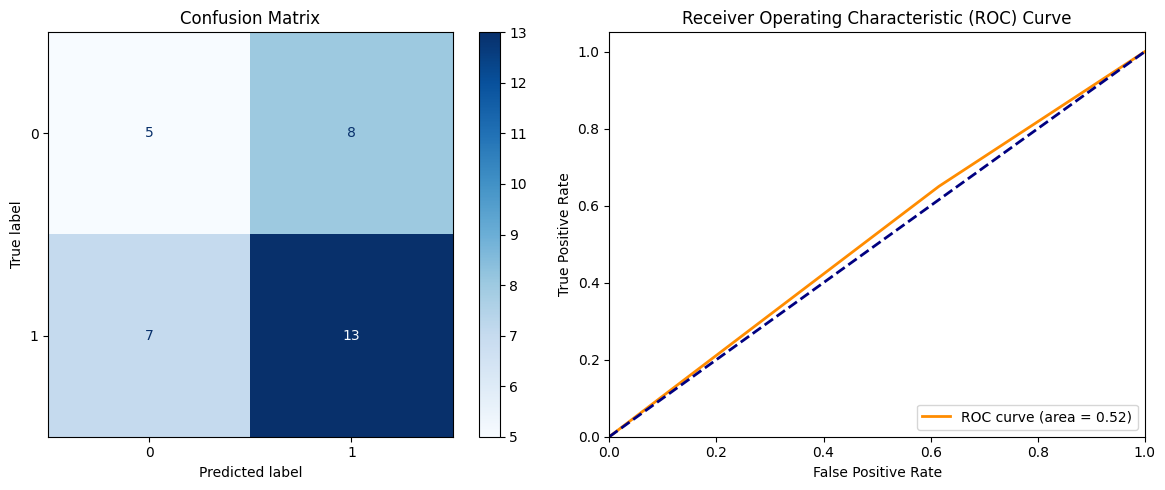

Accuracy score =  0.5454545454545454
Balanced Accuracy Score =  0.5173076923076924
Precision Score =  0.6190476190476191
Recall score =  0.65
**************************************************************************************************************************************************************************
KNN Evaluation:


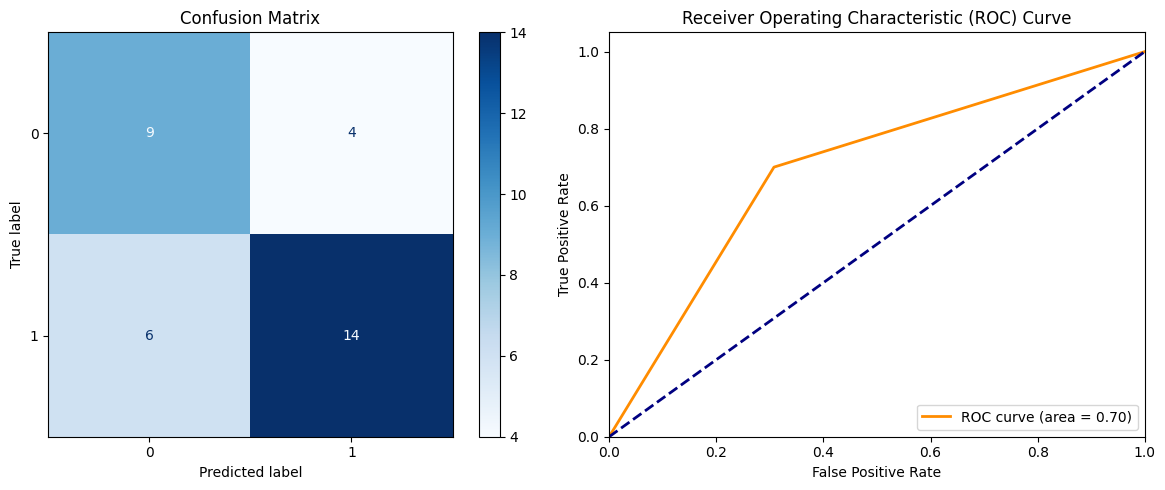

Accuracy score =  0.696969696969697
Balanced Accuracy Score =  0.6961538461538461
Precision Score =  0.7777777777777778
Recall score =  0.7
**************************************************************************************************************************************************************************
Random Validation Forest:


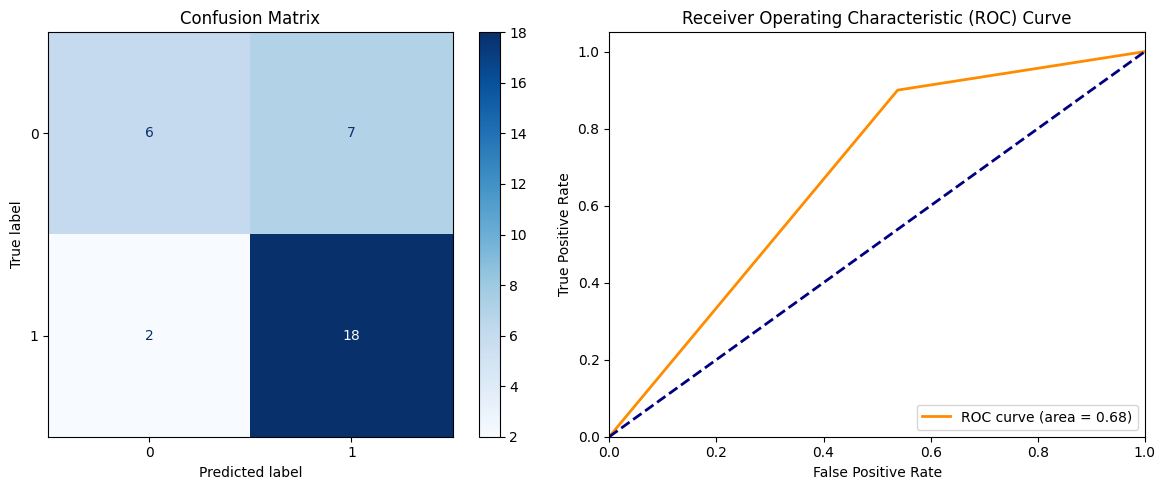

Accuracy score =  0.7272727272727273
Balanced Accuracy Score =  0.6807692307692308
Precision Score =  0.72
Recall score =  0.9


In [35]:
# Decision Tree evaluation
print("Decision Tree Evaluation:")
ac = test_algorithm(dt_classifier,X_train, y_train, X_test, y_test)
dt_accuracy_score_list.append(ac)

print("**************************************************************************************************************************************************************************")

# KNN evaluation
print("KNN Evaluation:")
ac = test_algorithm(knn_classifier,X_train, y_train, X_test, y_test)
knn_accuracy_score_list.append(ac)


print("**************************************************************************************************************************************************************************")


# Random Forest evaluation
print("Random Validation Forest:")
ac = test_algorithm(cv_classifier,X_train, y_train, X_test, y_test)
rf_accuracy_score_list.append(ac)

- ### Evaluation 5 (Without features that are not important and without feautures with missing values)
[[ go back to the top ]](#Table-of-contents)






In [36]:
ds=hcc_data_cleaned.drop(columns=low_importance)
ds=hcc_data_cleaned.drop(columns=inputs_missing)

y_2=ds['Class']
x_2=ds.drop('Class',axis=1)


In [37]:
# Assuming 'Class' is the target variable and already encoded as 0 or 1
X = hcc_data_cleaned.drop('Class', axis=1)
y = hcc_data_cleaned['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)


#Initialize the Random Forest classifier
cv_classifier= RandomForestClassifier(random_state=42)

Decision Tree Evaluation:


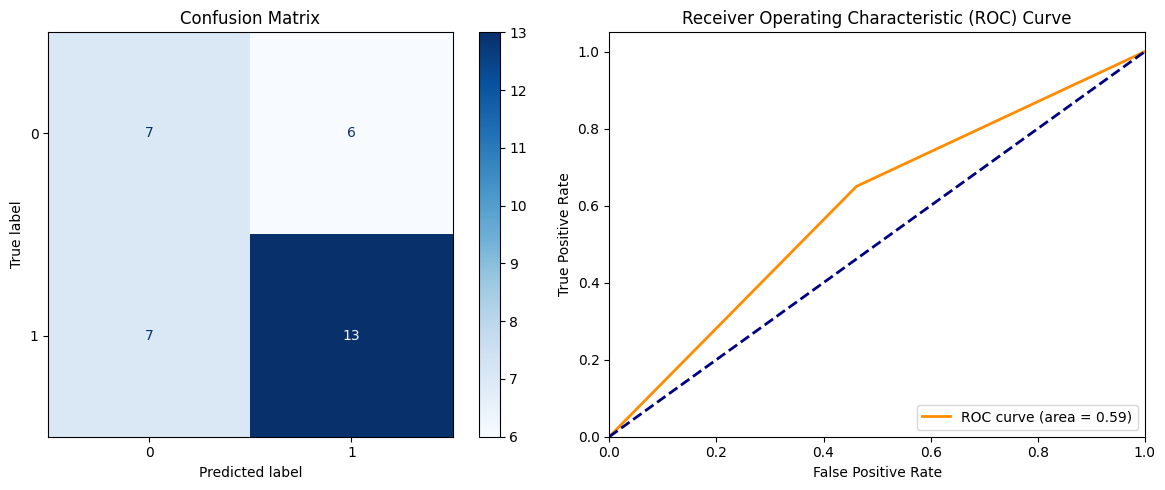

Accuracy score =  0.6060606060606061
Balanced Accuracy Score =  0.5942307692307692
Precision Score =  0.6842105263157895
Recall score =  0.65
**************************************************************************************************************************************************************************
KNN Evaluation:


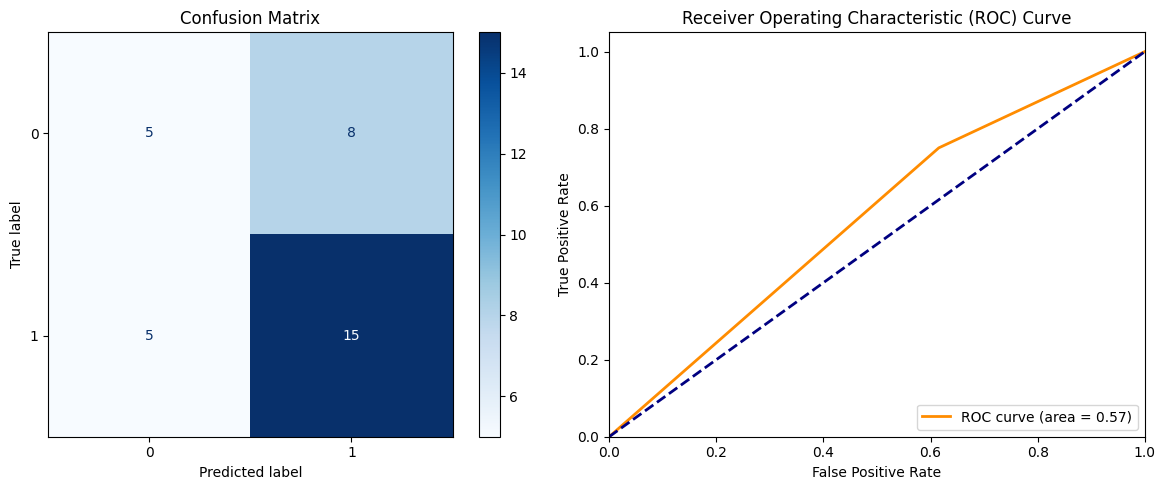

Accuracy score =  0.6060606060606061
Balanced Accuracy Score =  0.5673076923076923
Precision Score =  0.6521739130434783
Recall score =  0.75
**************************************************************************************************************************************************************************
Random Validation Forest:


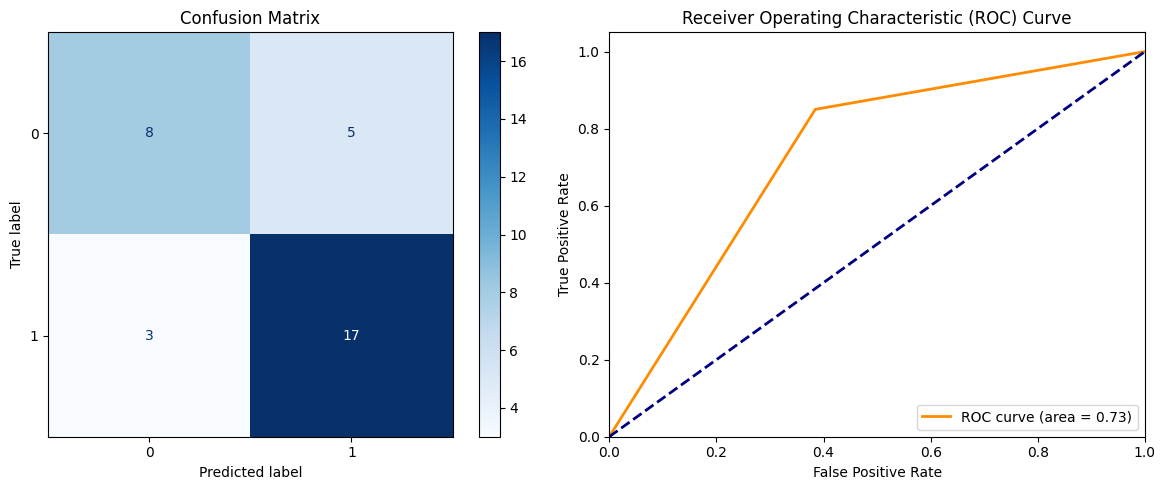

Accuracy score =  0.7575757575757576
Balanced Accuracy Score =  0.7326923076923078
Precision Score =  0.7727272727272727
Recall score =  0.85


In [38]:
# Decision Tree evaluation
print("Decision Tree Evaluation:")
ac = test_algorithm(dt_classifier,X_train, y_train, X_test, y_test)
dt_accuracy_score_list.append(ac)

print("**************************************************************************************************************************************************************************")

# KNN evaluation
print("KNN Evaluation:")
ac = test_algorithm(knn_classifier,X_train, y_train, X_test, y_test)
knn_accuracy_score_list.append(ac)


print("**************************************************************************************************************************************************************************")


# Random Forest evaluation
print("Random Validation Forest:")
ac = test_algorithm(cv_classifier,X_train, y_train, X_test, y_test)
rf_accuracy_score_list.append(ac)

## 7. Results Analysis and Comparison
[[ go back to the top ]](#Table-of-contents)

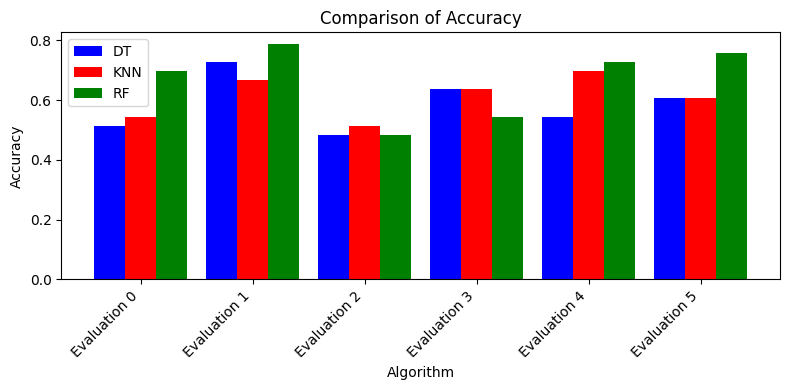

In [39]:
fig, ax = plt.subplots(figsize=(8, 4))  
bar_width = 0.25  
group_spacing = 0.15  

# Calculate positions for each group
index = np.arange(len(dt_accuracy_score_list)) * (bar_width * 3 + group_spacing)

bars1 = ax.bar(index, dt_accuracy_score_list, bar_width, label='DT', color='blue')
bars2 = ax.bar(index + bar_width, knn_accuracy_score_list, bar_width, label='KNN', color='red')
bars3 = ax.bar(index + 2 * bar_width, rf_accuracy_score_list, bar_width, label='RF', color='green')  

ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy')
ax.set_xticks(index + bar_width)  # Adjusting the x-tick positions
ax.set_xticklabels(['Evaluation 0', 'Evaluation 1', 'Evaluation 2', 'Evaluation 3', 'Evaluation 4', 'Evaluation 5'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

By using and exploring the data in different ways we were able to see the impacts of different Data Preprocessing techniques and explore our horizons beyond what we had learned in class

In using diferent ways of data modeling we learned the way different algorithms work with the data and how the values may differ significantly for the same train/test split 

After this evaluations and assuming we are using the Random Forest as our classifier we can conclude that by removing the low important columns and by removing the columns with the most missing values, we would get the best accuracy (best prediction)

